In [3]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [7]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# list of kernel to try
kernels = ['linear','poly','rbf','sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel,random_state=42)
    svm.fit(x_train,y_train)
    prediction = svm.predict(x_test)
    print(f"kernel: {kernel}")
    acc=accuracy_score(y_test,prediction)
    accuracies.append(acc)
    print(f"accuracy: {acc}")
    print("classification report:\n",classification_report(y_test,prediction))
    print("confusion metrics:\n",confusion_matrix(y_test,prediction))
    print('\n\n')
    

kernel: linear
accuracy: 1.0
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

confusion metrics:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]



kernel: poly
accuracy: 0.9736842105263158
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

confusion metrics:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


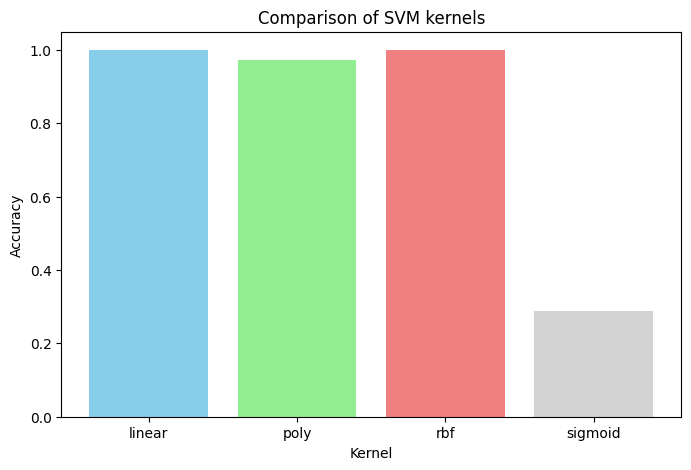

In [18]:
#plotting accuracies for comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(kernels,accuracies,color=['skyblue','lightgreen','lightcoral','lightgrey'])
plt.title("Comparison of SVM kernels")
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()